### in this notebook we'll convert the coco dataset to a csv format to use in tflite as a custom dataset. we'll get just the bounding boxes

this is taken from the filtered coco dataset

link: https://www.tensorflow.org/lite/models/modify/model_maker/object_detection

In [12]:
import json
import os
import cv2
import matplotlib.pyplot as plt

In [54]:
with open('annotations/coco_annotation.json', 'r') as f:
    data = json.load(f)
    
total_images = len(data['annotations'])
test_split = 0.2
val_split = 0.2
train_index_limit =  int(total_images * (1 - test_split - val_split))
test_index_limit = train_index_limit + int(total_images * test_split)
val_index_limit = total_images

annotations = data['annotations'] 

annlist = []
img_ids = []
for annot in annotations:
    img_ids.append(annot['image_id'])
img_ids_unique = set(img_ids)

for i,annota in enumerate(annotations):
    # get the values to be entered in the 1st column of the csv file
    if i <= train_index_limit:
        col1 = 'TRAINING'
    elif i > train_index_limit and i <= test_index_limit:
        col1 = 'TEST'
    else:
        col1 = 'VALIDATION'
        
    # get the file path to the image
    img_root = 'images/'
    imgid_zerofill = str(annota['image_id']).zfill(12)
    img_filename = f'{imgid_zerofill}.jpg'
    img_path = os.path.join(img_root, img_filename)   
    imheight,imwidth = cv2.imread(img_path).shape[:2]  
    
    
    for image_idb in img_ids_unique: # check every image ids against each other. if they're the same, its the same image.
        if annota['image_id'] == image_idb:
            category = 'person' if annota['category_id'] == 1 else 'animal'
            bbox = annota['bbox']
            xmin, ymin, width, height = map(int,bbox)
            xmin /= imwidth
            width /= imwidth
            ymin /= imheight
            height /= imheight
            
            annlist.append([col1, img_path, category, xmin, ymin, xmin+width, ymin+height])
                 


In [55]:
annlist[4000]

['TRAINING',
 'images/000000440171.jpg',
 'person',
 0.16058394160583941,
 0.0109375,
 0.46958637469586373,
 0.28281249999999997]

In [58]:
def viz_csv_output(annot):
    t_img = cv2.imread(annot[1])
    imheight,imwidth = t_img.shape[:2]
    t_text = annot[2]
    xmin, ymin, xmax, ymax = annot[3:]
    xmin *= imwidth
    ymin *= imheight
    xmax *= imwidth
    ymax *= imheight
    
    t_img = cv2.cvtColor(t_img, cv2.COLOR_BGR2RGB)
    
    cv2.putText(t_img, t_text, (int(xmin), int(ymin)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
    cv2.rectangle(t_img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 255, 255), 1)
    
    print(xmin, ymin, xmax, ymax)
    
    plt.figure(figsize=(10,7))
    plt.imshow(t_img)

66.0 7.0 193.0 180.99999999999997


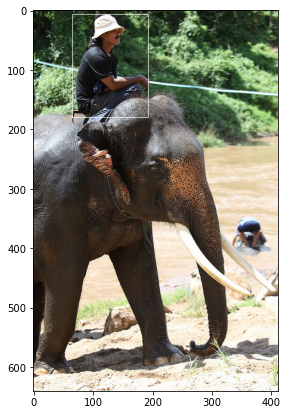

In [59]:
# remember that this outputs only one bbox in the image
viz_csv_output(annlist[4000])

(66, 7) (193, 181)
(1, 142) (410, 618)
(332, 345) (383, 398)


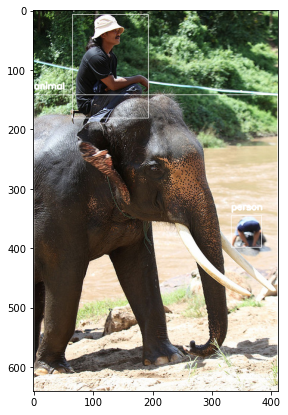

In [37]:
viz_coco(440171)

#### the bboxes from the csv output (after conversion to decimals, ie bbox coordinates relative to the image size) and the bboxes before conversion match! 

### test a few other instances 

In [60]:
annlist[100]

['TRAINING',
 'images/000000292456.jpg',
 'person',
 0.258,
 0.08266666666666667,
 0.378,
 0.7173333333333334]

(184, 45) (312, 300)
(322, 68) (353, 160)
(129, 31) (189, 269)


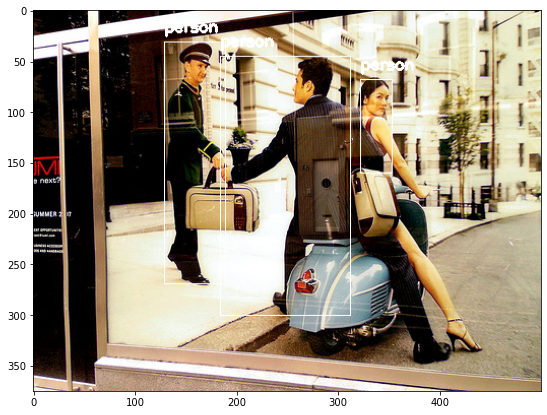

In [61]:
viz_coco(292456)

129.0 31.0 189.0 269.0


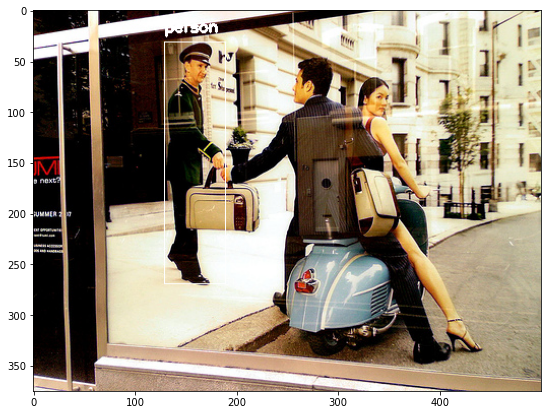

In [63]:
viz_csv_output(annlist[100])

### check the class imbalance 

In [10]:
animals = 0
people = 0
for annot in annlist:
    if annot[2] == 'person':
        people += 1
    elif annot[2] == 'animal':
        animals += 1

In [11]:
animals, people

(755, 11004)

There are very few animals when compared to people

In [70]:
len(annlist)

11759

(388, 69) (497, 346)
(0, 262) (62, 298)


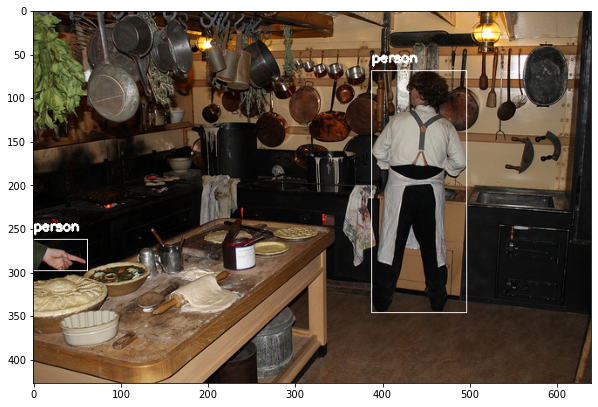

In [30]:
viz_coco(397133)

(274, 123) (455, 567)
(485, 257) (509, 289)
(501, 256) (515, 286)


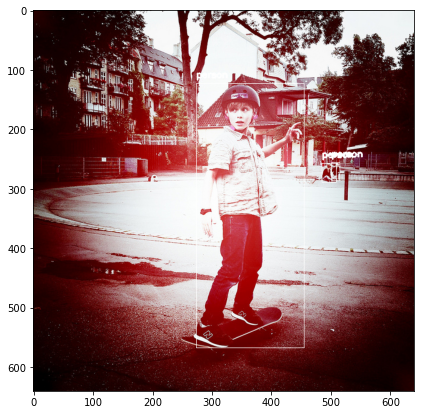

In [29]:
viz_coco(562229)

In [22]:
len(data['images'])

2909

In [11]:
viz_coco(445248)

NameError: name 'plt' is not defined

### appendix 

In [6]:
len(annlist)

11759

In [7]:
samp = data['images'][0]

In [8]:
samp

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

check if all annotations are obtained for each image

In [32]:
for ann in annlist:
    if ann[1] == 'images/000000562229.jpg':
        print(ann)
    

['TRAINING', 'images/000000562229.jpg', 'person', 0.42921875, 0.193265625, 1.12359375, 0.47640625000000003]
['TRAINING', 'images/000000562229.jpg', 'person', 0.758078125, 0.40182812500000004, 0.8096093750000001, 0.4405625]
['TEST', 'images/000000562229.jpg', 'person', 0.784046875, 0.40014062499999997, 0.8313125, 0.42256249999999995]


In [18]:
imheight,imwidth = cv2.imread('images/000000562229.jpg').shape[:2]
imheight,imwidth

(640, 640)

In [48]:
total_images = len(data['annotations'])
test_split = 0.2
val_split = 0.2
train_index_limit =  int(total_images * (1 - test_split - val_split))
test_index_limit = train_index_limit + int(total_images * test_split)
val_index_limit = total_images

In [49]:
train_index_limit, test_index_limit, val_index_limit

(7055, 9406, 11759)

In [42]:
print('train_images:', train_index_limit + 1)
print('test_image:', test_index_limit - train_index_limit)
print('val_images:', val_index_limit - test_index_limit)

train_images: 1746
test_image: 581
val_images: 583


In [39]:
2909 * (1 - 0.2 - 0.2)

1745.4000000000003

In [12]:
import cv2
import matplotlib.pyplot as plt

In [28]:
def viz_coco(img_id = 69213):
    with open('annotations/coco_annotation.json', 'r') as f:
        data = json.load(f)
    
    imid_zerofill = str(img_id).zfill(12)
    filename = f'{imid_zerofill}.jpg'
    image = cv2.imread(f'images/{filename}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    annotations = data['annotations']    
    for annot in annotations:
        if annot['image_id'] == img_id:
            bbox = annot['bbox']
            xmin, ymin, width, height = map(int, bbox)
            category = 'person' if annot['category_id'] == 1 else 'animal' 
            cv2.putText(image, category, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
            cv2.rectangle(image, (xmin, ymin), (xmin+width, ymin+height), (255, 255, 255), 1)
                
            print((xmin, ymin), (xmin+width, ymin+height))
    plt.figure(figsize=(10,7))
    plt.imshow(image)

In [72]:
annlist[7056]

['TEST', 'images/000000250282.jpg', 'person', 0, 34, 388, 673]

In [65]:
img_ids = []
for annot in annotations:
    img_ids.append(annot['image_id'])
img_ids_unique = set(img_ids)


In [67]:
len(img_ids)

11759

In [66]:
len(img_ids_unique)

2909

In [63]:
len(annlist)

54087